In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("CSV\department-sales.csv")

## Overwiev

In [3]:
df.head()

,CompanyName,Industry,Department,YearOfEstablishment,NetSales($mln.),CostOfSales($mln.)
0,"Company ""A1""",Mining,dept-a1-01,1985,1719,1735
1,"Company ""A1""",Mining,dept-a1-02,1985,1291,947
2,"Company ""A1""",Mining,dept-a1-03,1985,1702,508
3,"Company ""A1""",Mining,dept-a1-04,1985,1008,468
4,"Company ""A1""",Mining,dept-a1-05,1985,2058,469


In [4]:
df.columns

Index(['CompanyName', 'Industry', 'Department', 'YearOfEstablishment',
       'NetSales($mln.)', 'CostOfSales($mln.)'],
      dtype='object')

In [5]:
df.shape

(500, 6)

The writing of the NetSales and CostOfSales columns will be anoying so lets change their names

In [6]:
df = df.rename(columns = {"NetSales($mln.)":"NetSales","CostOfSales($mln.)":"CostofSales"})

In [7]:
df[["NetSales","CostofSales"]].describe()

,NetSales,CostofSales
count,500.000000,500.000000
mean,1421.602000,1112.720000
std,517.660886,377.842087
min,504.000000,452.000000
25%,964.500000,795.750000
50%,1437.500000,1111.500000
75%,1861.250000,1418.000000
max,2352.000000,1750.000000


In [8]:
df.isnull().sum()

CompanyName            0
Industry               0
Department             0
YearOfEstablishment    0
NetSales               0
CostofSales            0
dtype: int64

There is no null(or na) values so no need to drop any rows

In [9]:
df["CompanyName"].unique()

array(['Company "A1"', 'Company "A2"', 'Company "B1"', 'Company "B2"',
       'Company "B3"', 'Company "C"'], dtype=object)

In [10]:
df["Industry"].unique()

array(['Mining', 'Food Industry', 'Construction', 'Utilities',
       'Electronics', 'Communications', 'Media',
       'Pharmaceutical Industry'], dtype=object)

In [11]:
df["Department"].unique()

array(['dept-a1-01', 'dept-a1-02', 'dept-a1-03', 'dept-a1-04',
       'dept-a1-05', 'dept-a1-06', 'dept-a1-07', 'dept-a1-08',
       'dept-a1-09', 'dept-a1-10', 'dept-a1-11', 'dept-a1-12',
       'dept-a1-13', 'dept-a1-14', 'dept-a1-15', 'dept-a1-16',
       'dept-a1-17', 'dept-a1-18', 'dept-a1-19', 'dept-a1-20',
       'dept-a1-21', 'dept-a1-22', 'dept-a1-23', 'dept-a1-24',
       'dept-a1-25', 'dept-a1-26', 'dept-a1-27', 'dept-a1-28',
       'dept-a1-29', 'dept-a1-30', 'dept-a1-31', 'dept-a1-32',
       'dept-a1-33', 'dept-a1-34', 'dept-a1-35', 'dept-a1-36',
       'dept-a1-37', 'dept-a1-38', 'dept-a1-39', 'dept-a1-40',
       'dept-a1-41', 'dept-a1-42', 'dept-a1-43', 'dept-a1-44',
       'dept-a1-45', 'dept-a1-46', 'dept-a1-47', 'dept-a1-48',
       'dept-a1-49', 'dept-a1-50', 'dept-a1-51', 'dept-a1-52',
       'dept-a1-53', 'dept-a1-54', 'dept-a1-55', 'dept-a1-56',
       'dept-a1-57', 'dept-a1-58', 'dept-a1-59', 'dept-a1-60',
       'dept-a1-61', 'dept-a1-62', 'dept-a1-63', 'dept-

## Time Trends

Understanding  the range of establishment years

In [12]:
df["YearOfEstablishment"].unique()

array([1985, 1987, 1990, 1998, 2001, 2007], dtype=int64)

In [13]:
year = df.groupby("CompanyName")["YearOfEstablishment"].value_counts().reset_index()
year

,CompanyName,YearOfEstablishment,count
0,"Company ""A1""",1985,73
1,"Company ""A2""",1987,69
2,"Company ""B1""",1990,114
3,"Company ""B2""",1998,156
4,"Company ""B3""",2001,58
5,"Company ""C""",2007,30


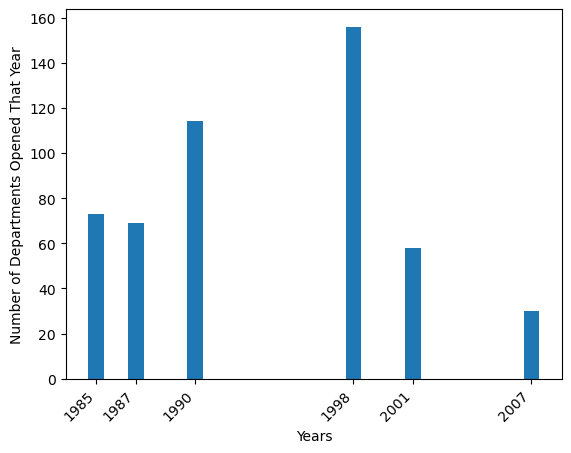

In [14]:
plt.bar(year["YearOfEstablishment"],year["count"])

plt.xlabel("Years")
plt.ylabel("Number of Departments Opened That Year")
plt.xticks(year["YearOfEstablishment"],rotation = 45, ha = "right")

plt.show()

## Observation
This plot shows us how many department the companies oppened during these years. So in hence sight we can say that in 1998 there was a huge boom in the economy. Or no? I'm not an economist don't take my word for it I just comment on what I see.

## Revenue Analysis

NetSales and CoastofSales comparison across Different Industries

In [15]:
ind_cn = df.groupby("Industry")[["NetSales","CostofSales"]].sum().reset_index()
ind_cn.sort_values(by = ["NetSales","CostofSales"],ascending = [False,False])

,Industry,NetSales,CostofSales
0,Communications,240577,183552
2,Electronics,163987,126376
1,Construction,92637,70188
5,Mining,90753,71846
4,Media,72501,56019
6,Pharmaceutical Industry,36210,36213
3,Food Industry,9391,8032
7,Utilities,4745,4134


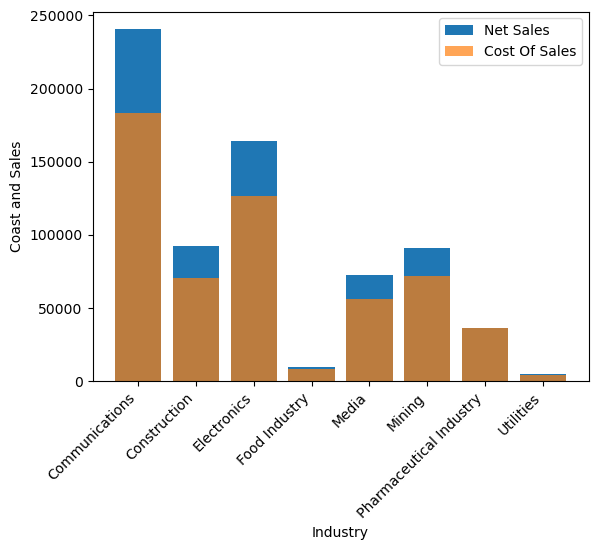

In [16]:
plt.bar(ind_cn["Industry"],ind_cn["NetSales"],label = "Net Sales",alpha = 1)
plt.bar(ind_cn["Industry"],ind_cn["CostofSales"],label = "Cost Of Sales",alpha = 0.7)

plt.xlabel("Industry")
plt.ylabel("Coast and Sales")
plt.xticks(ind_cn["Industry"], rotation = 45, ha = "right")

plt.legend()
plt.show()

The most amount of revenue comes from communications there for the companies that work on cominications would be expected to be the most profitable.

Profit for Each Company

In [17]:
df["Profit"] = df["NetSales"] - df["CostofSales"]

In [18]:
pro_com = df.groupby("CompanyName")["Profit"].sum().reset_index()
pro_com.sort_values(by = "Profit", ascending = False)

,CompanyName,Profit
3,"Company ""B2""",53076
2,"Company ""B1""",37611
1,"Company ""A2""",23060
4,"Company ""B3""",20431
0,"Company ""A1""",20266
5,"Company ""C""",-3


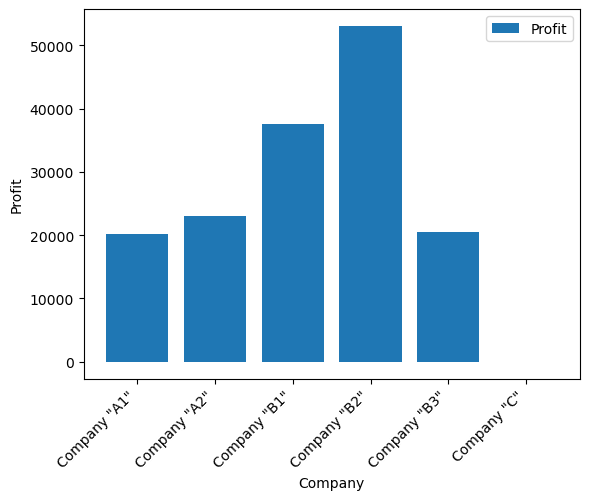

In [19]:
plt.bar(pro_com["CompanyName"],pro_com["Profit"],label = "Profit")

plt.xlabel("Company")
plt.ylabel("Profit")
plt.xticks(pro_com["CompanyName"], rotation = 45, ha = "right")

plt.legend()
plt.show()

In [20]:
comp_ind = df.groupby(["CompanyName","Industry"])["Profit"].sum().reset_index()
comp_ind = comp_ind[comp_ind["Industry"] == "Communications"]
comp_ind

,CompanyName,Industry,Profit
5,"Company ""B2""",Communications,53076
6,"Company ""B3""",Communications,3949


Company "B2" and Company "B3" works on communications while comapny "B2" supports our companies that works on communications are most profitable, Company "B2" has the highest profit margin of all companies, conclution how ever  Company "B3" is going on a much average profit.

## Industry Analysis

Understanding the distribution of companies across different industries

In [21]:
ind_dis = df["Industry"].value_counts().reset_index()
ind_dis

,Industry,count
0,Communications,165
1,Electronics,114
2,Mining,66
3,Construction,66
4,Media,49
5,Pharmaceutical Industry,30
6,Food Industry,7
7,Utilities,3


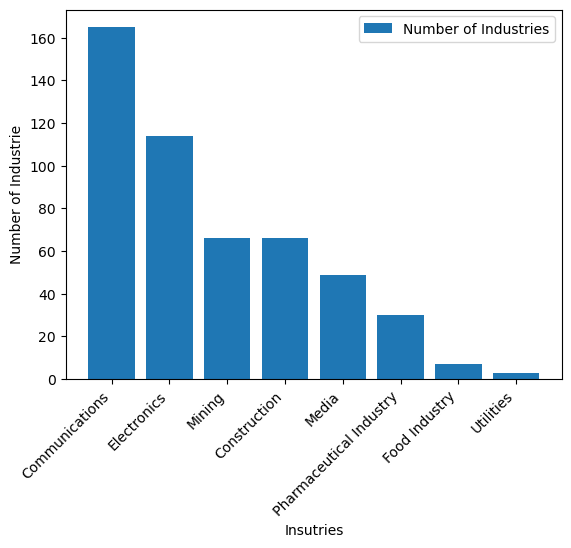

In [22]:
plt.bar(ind_dis["Industry"],ind_dis["count"],label = "Number of Industries")

plt.xlabel("Insutries")
plt.ylabel("Number of Industrie")
plt.xticks(ind_dis["Industry"], rotation = 45, ha = "right")
plt.legend()
plt.show()

## Observation
As seen in the above, the industry seems to be focused on Cominications.

Exploring the average NetSales and CostOfSales for each industry

In [23]:
ind_avrg = df.groupby("Industry")[["NetSales","CostofSales"]].agg({"NetSales" : "mean", "CostofSales" : "mean"}).reset_index()
ind_avrg

,Industry,NetSales,CostofSales
0,Communications,1458.042424,1112.436364
1,Construction,1403.590909,1063.454545
2,Electronics,1438.482456,1108.561404
3,Food Industry,1341.571429,1147.428571
4,Media,1479.612245,1143.244898
5,Mining,1375.045455,1088.575758
6,Pharmaceutical Industry,1207.000000,1207.100000
7,Utilities,1581.666667,1378.000000


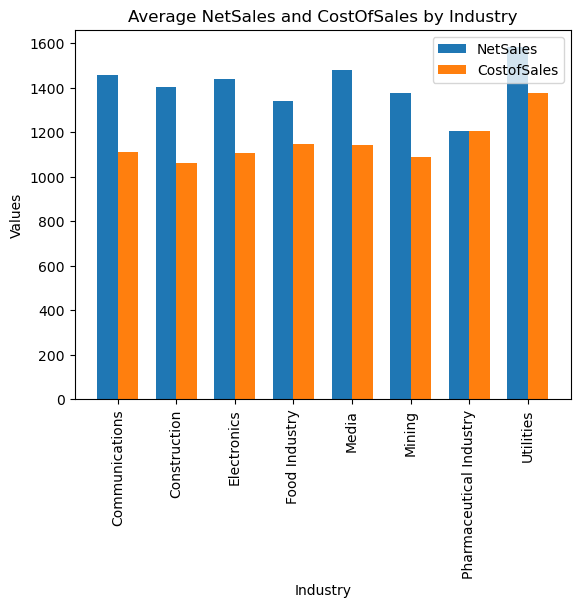

In [24]:
bar_positions1 = range(len(ind_avrg))
bar_positions2 = [pos + 0.35 for pos in bar_positions1]

plt.bar(bar_positions1, ind_avrg['NetSales'], width=0.35, label='NetSales')
plt.bar(bar_positions2, ind_avrg['CostofSales'], width=0.35, label='CostofSales')

plt.xticks([pos + 0.35 / 2 for pos in bar_positions1], ind_avrg['Industry'],rotation = 90)

plt.xlabel('Industry')
plt.ylabel('Values')
plt.title('Average NetSales and CostOfSales by Industry')
plt.legend()

plt.show()

Identifing the industries with the highest and lowest average profits

In [25]:
avrg_pro = df.groupby("Industry")["Profit"].agg("mean").reset_index()
avrg_pro.sort_values(by = "Profit", ascending = False)

,Industry,Profit
0,Communications,345.606061
1,Construction,340.136364
4,Media,336.367347
2,Electronics,329.921053
5,Mining,286.469697
7,Utilities,203.666667
3,Food Industry,194.142857
6,Pharmaceutical Industry,-0.100000


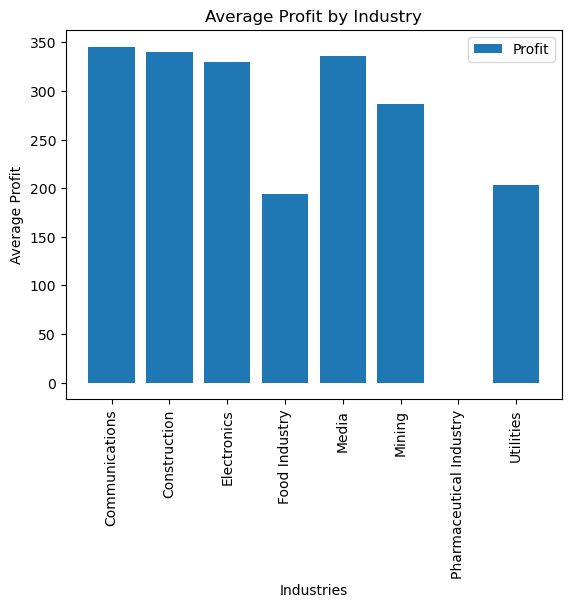

In [26]:
plt.bar(avrg_pro["Industry"],avrg_pro["Profit"],label  = "Profit")

plt.xlabel("Industries")
plt.ylabel("Average Profit")
plt.title("Average Profit by Industry")
plt.xticks(avrg_pro["Industry"], rotation = 90)

plt.legend()
plt.show()

These plots or graphs shows us that most profitable branch of Industries ar as follows

1- Communications

2- Construction

3- Media

4- Electronics

5- Mining

6- Utilities

7- Food Industry

8- Pharmaceutical Industry

## Departmental Analysis

Identifing which departments contribute the most to the overall revenue and profit.

In [27]:
com_dep = df.groupby("Department")["Profit"].sum().reset_index()
com_dep.nlargest(1,"Profit")

,Department,Profit
246,dept-b1-90,1777


In [28]:
com_dep.nsmallest(1,"Profit")

,Department,Profit
36,dept-a1-37,-1136


## Correlation Analysis

In [29]:
corr_cn = df[["NetSales","CostofSales","Profit"]].corr()
corr_cn

,NetSales,CostofSales,Profit
NetSales,1.000000,-0.049965,0.817946
CostofSales,-0.049965,1.000000,-0.615445
Profit,0.817946,-0.615445,1.000000


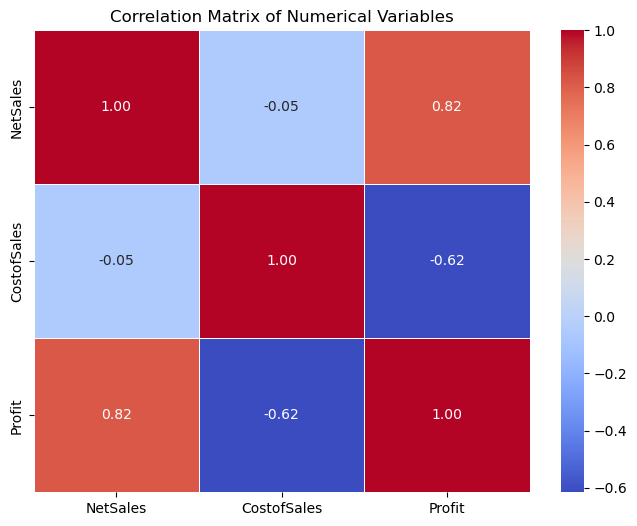

In [30]:
import seaborn as sns

plt.figure(figsize=(8, 6))

sns.heatmap(corr_cn, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix of Numerical Variables')
plt.show()

## Company Analysis

In [31]:
df["CompanyName"].unique()

array(['Company "A1"', 'Company "A2"', 'Company "B1"', 'Company "B2"',
       'Company "B3"', 'Company "C"'], dtype=object)

## Company "A1"

In [32]:
A1 = df.loc[df["CompanyName"] == "Company \"A1\""]
A1.head()

,CompanyName,Industry,Department,YearOfEstablishment,NetSales,CostofSales,Profit
0,"Company ""A1""",Mining,dept-a1-01,1985,1719,1735,-16
1,"Company ""A1""",Mining,dept-a1-02,1985,1291,947,344
2,"Company ""A1""",Mining,dept-a1-03,1985,1702,508,1194
3,"Company ""A1""",Mining,dept-a1-04,1985,1008,468,540
4,"Company ""A1""",Mining,dept-a1-05,1985,2058,469,1589


In [33]:
len(A1["Department"])

73

Company "A1" has 73 departments

In [34]:
A1["Industry"].unique()

array(['Mining', 'Food Industry'], dtype=object)

Company "A1" works on mining and food ındustries

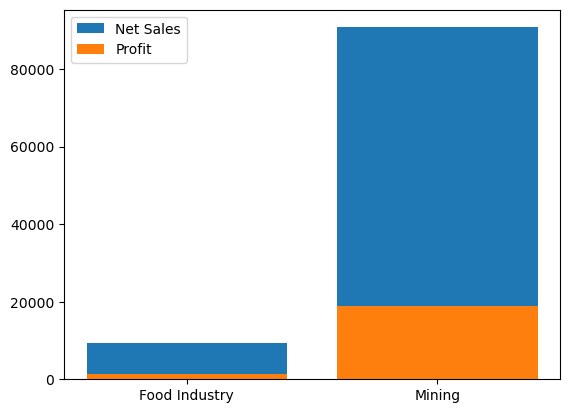

In [35]:
ind_snp = A1.groupby("Industry")[["NetSales","Profit"]].sum().reset_index()


plt.bar(ind_snp["Industry"],ind_snp["NetSales"],label = "Net Sales")
plt.bar(ind_snp["Industry"],ind_snp["Profit"],label = "Profit")


plt.legend()
plt.show()

Tho most amount of sales and profit comes from mining industry

In [36]:
snp_a1 = A1[["NetSales","CostofSales","Profit"]].sum().reset_index()
snp_a1

,index,0
0,NetSales,100144
1,CostofSales,79878
2,Profit,20266


Net sales, cost of sales and profit for Company "A1"

Most profitable departments of Company "A1"

In [37]:
dep_snp_a1 = A1.groupby("Department")["Profit"].sum().reset_index()
dep_snp_a1.nlargest(10,"Profit")

,Department,Profit
4,dept-a1-05,1589
31,dept-a1-32,1551
57,dept-a1-58,1332
5,dept-a1-06,1312
21,dept-a1-22,1296
2,dept-a1-03,1194
24,dept-a1-25,1178
62,dept-a1-63,1137
55,dept-a1-56,1129
16,dept-a1-17,1058


Least profitable departments of Company "A1"

In [38]:
dep_snp_a1.nsmallest(10,"Profit")

,Department,Profit
36,dept-a1-37,-1136
41,dept-a1-42,-1077
18,dept-a1-19,-948
33,dept-a1-34,-939
28,dept-a1-29,-812
60,dept-a1-61,-804
56,dept-a1-57,-750
17,dept-a1-18,-660
63,dept-a1-64,-481
42,dept-a1-43,-432


## Company "A2"

In [39]:
A2 = df.loc[df["CompanyName"] == "Company \"A2\""]
A2.head()

,CompanyName,Industry,Department,YearOfEstablishment,NetSales,CostofSales,Profit
73,"Company ""A2""",Construction,dept-a2-01,1987,1175,991,184
74,"Company ""A2""",Construction,dept-a2-02,1987,1739,1360,379
75,"Company ""A2""",Construction,dept-a2-03,1987,1679,1713,-34
76,"Company ""A2""",Construction,dept-a2-04,1987,2331,1293,1038
77,"Company ""A2""",Construction,dept-a2-05,1987,816,1737,-921


In [40]:
len(A2["Department"])

69

Company "A2" has 69 departments

In [41]:
A2["Industry"].unique()

array(['Construction', 'Utilities'], dtype=object)

Company "A2" works on construction and utilities industries

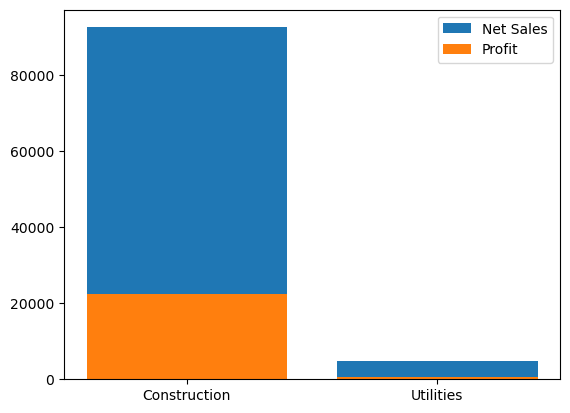

In [42]:
ind_snp2 = A2.groupby("Industry")[["NetSales","Profit"]].sum().reset_index()


plt.bar(ind_snp2["Industry"],ind_snp2["NetSales"],label = "Net Sales")
plt.bar(ind_snp2["Industry"],ind_snp2["Profit"],label = "Profit")


plt.legend()
plt.show()

The most amount of sales and profit comes from comunication industry

Net sales, cost of sales and profit for Company "A2"

In [43]:
snp_a2 = A2[["NetSales","CostofSales","Profit"]].sum().reset_index()
snp_a2

,index,0
0,NetSales,97382
1,CostofSales,74322
2,Profit,23060


Most profitable departments of Company "A2"

In [44]:
dep_snp_a2 = A2.groupby("Department")["Profit"].sum().reset_index()
dep_snp_a2.nlargest(10,"Profit")

,Department,Profit
27,dept-a2-28,1680
21,dept-a2-22,1560
35,dept-a2-36,1497
59,dept-a2-60,1355
31,dept-a2-32,1306
42,dept-a2-43,1304
45,dept-a2-46,1296
15,dept-a2-16,1193
22,dept-a2-23,1081
3,dept-a2-04,1038


Least profitable departments of Company "A2"

In [45]:
dep_snp_a2.nsmallest(10,"Profit")

,Department,Profit
34,dept-a2-35,-1065
4,dept-a2-05,-921
26,dept-a2-27,-720
68,dept-a2-69,-718
41,dept-a2-42,-652
56,dept-a2-57,-564
54,dept-a2-55,-563
20,dept-a2-21,-548
53,dept-a2-54,-454
19,dept-a2-20,-315


## Company "B1"

In [46]:
B1 = df.loc[df["CompanyName"] == "Company \"B1\""]
B1.head()

,CompanyName,Industry,Department,YearOfEstablishment,NetSales,CostofSales,Profit
142,"Company ""B1""",Electronics,dept-b1-01,1990,806,862,-56
143,"Company ""B1""",Electronics,dept-b1-02,1990,1636,1097,539
144,"Company ""B1""",Electronics,dept-b1-03,1990,828,1097,-269
145,"Company ""B1""",Electronics,dept-b1-04,1990,1055,1138,-83
146,"Company ""B1""",Electronics,dept-b1-05,1990,635,692,-57


In [47]:
len(B1["Department"])

114

Company "B1" has 114 departments

In [48]:
B1["Industry"].unique()

array(['Electronics'], dtype=object)

Company "B1" just works on electronics industry

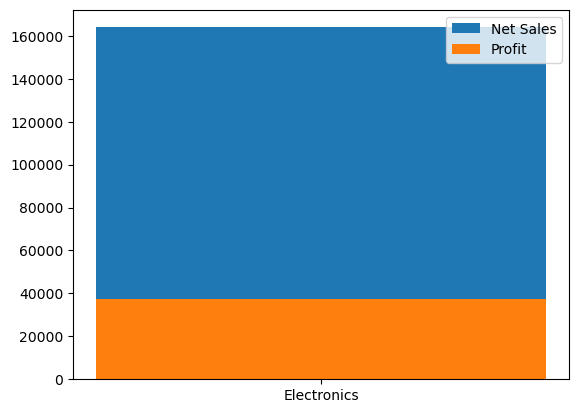

In [49]:
ind_snp3 = B1.groupby("Industry")[["NetSales","Profit"]].sum().reset_index()


plt.bar(ind_snp3["Industry"],ind_snp3["NetSales"],label = "Net Sales")
plt.bar(ind_snp3["Industry"],ind_snp3["Profit"],label = "Profit")


plt.legend()
plt.show()

Net sales, cost of sales and profit for Company "B1"

In [50]:
snp_b1 = B1[["NetSales","CostofSales","Profit"]].sum().reset_index()
snp_b1

,index,0
0,NetSales,163987
1,CostofSales,126376
2,Profit,37611


Most profitable departments of Company "B1"

In [51]:
dep_snp_b1 = B1.groupby("Department")["Profit"].sum().reset_index()
dep_snp_b1.nlargest(10,"Profit")

,Department,Profit
104,dept-b1-90,1777
41,dept-b1-27,1734
39,dept-b1-25,1727
45,dept-b1-31,1707
65,dept-b1-51,1689
34,dept-b1-20,1624
102,dept-b1-88,1539
63,dept-b1-49,1481
95,dept-b1-81,1422
69,dept-b1-55,1405


Least profitable departments of Company "B1"

In [52]:
dep_snp_b1.nsmallest(10,"Profit")

,Department,Profit
112,dept-b1-98,-1122
113,dept-b1-99,-1030
43,dept-b1-29,-971
54,dept-b1-40,-818
38,dept-b1-24,-798
18,dept-b1-108,-736
108,dept-b1-94,-731
26,dept-b1-12,-725
85,dept-b1-71,-690
74,dept-b1-60,-651


## Company "B2"

In [53]:
B2 = df.loc[df["CompanyName"] == "Company \"B2\""]
B2.head()

,CompanyName,Industry,Department,YearOfEstablishment,NetSales,CostofSales,Profit
256,"Company ""B2""",Communications,dept-b2-01,1998,2257,501,1756
257,"Company ""B2""",Communications,dept-b2-02,1998,959,680,279
258,"Company ""B2""",Communications,dept-b2-03,1998,1701,771,930
259,"Company ""B2""",Communications,dept-b2-04,1998,1432,492,940
260,"Company ""B2""",Communications,dept-b2-05,1998,558,528,30


In [54]:
len(B2["Department"])

156

Company "B2" has 156 departments

In [55]:
B2["Industry"].unique()

array(['Communications'], dtype=object)

Company "B2" work on Comunications industry

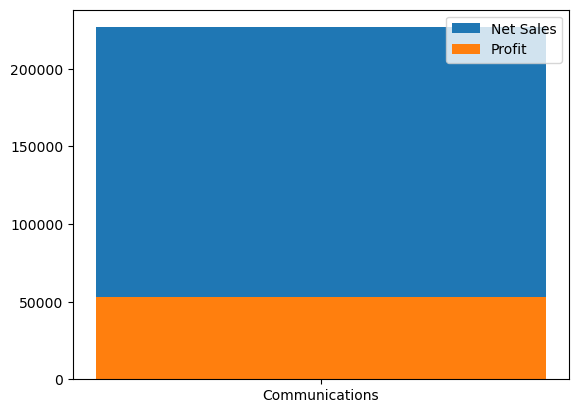

In [56]:
ind_snp4 = B2.groupby("Industry")[["NetSales","Profit"]].sum().reset_index()


plt.bar(ind_snp4["Industry"],ind_snp4["NetSales"],label = "Net Sales")
plt.bar(ind_snp4["Industry"],ind_snp4["Profit"],label = "Profit")


plt.legend()
plt.show()

Net sales, cost of sales and profit for Company "B2"

In [57]:
snp_b2 = B2[["NetSales","CostofSales","Profit"]].sum().reset_index()
snp_b2

,index,0
0,NetSales,226824
1,CostofSales,173748
2,Profit,53076


Most profitable departments of Company "B2"

In [58]:
dep_snp_b2 = B2.groupby("Department")["Profit"].sum().reset_index()
dep_snp_b2.nlargest(10,"Profit")

,Department,Profit
11,dept-b2-101,1764
0,dept-b2-01,1756
98,dept-b2-42,1688
87,dept-b2-31,1649
37,dept-b2-125,1590
23,dept-b2-112,1572
28,dept-b2-117,1545
59,dept-b2-145,1545
105,dept-b2-49,1541
68,dept-b2-153,1509


Least profitable departments of Company "B2"

In [59]:
dep_snp_b2.nsmallest(10,"Profit")

,Department,Profit
12,dept-b2-102,-1016
14,dept-b2-104,-983
91,dept-b2-35,-979
9,dept-b2-10,-932
18,dept-b2-108,-890
67,dept-b2-152,-874
62,dept-b2-148,-829
108,dept-b2-52,-783
90,dept-b2-34,-682
22,dept-b2-111,-628


## Company "B3"

In [60]:
B3 = df.loc[df["CompanyName"] == "Company \"B3\""]
B3.head()

,CompanyName,Industry,Department,YearOfEstablishment,NetSales,CostofSales,Profit
412,"Company ""B3""",Communications,dept-b3-01,2001,1098,1117,-19
413,"Company ""B3""",Communications,dept-b3-02,2001,2294,1192,1102
414,"Company ""B3""",Communications,dept-b3-03,2001,946,654,292
415,"Company ""B3""",Communications,dept-b3-04,2001,1190,743,447
416,"Company ""B3""",Communications,dept-b3-05,2001,2042,1299,743


In [61]:
len(B3["Department"])

58

Company "B3" has 58 departments

In [62]:
B3["Industry"].unique()

array(['Communications', 'Media'], dtype=object)

Company "B3" works on comunucations and media industries

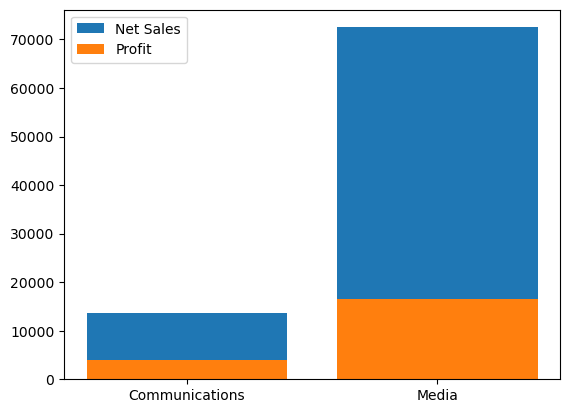

In [63]:
ind_snp5 = B3.groupby("Industry")[["NetSales","Profit"]].sum().reset_index()


plt.bar(ind_snp5["Industry"],ind_snp5["NetSales"],label = "Net Sales")
plt.bar(ind_snp5["Industry"],ind_snp5["Profit"],label = "Profit")


plt.legend()
plt.show()

As seen in the graph we can say that Company "B2"'s profit mostly comes from media

Net sales, cost of sales and profit for Company "B3"

In [64]:
snp_b3 = B3[["NetSales","CostofSales","Profit"]].sum().reset_index()
snp_b3

,index,0
0,NetSales,86254
1,CostofSales,65823
2,Profit,20431


Most profitable departments of Company "B3"

In [65]:
dep_snp_b3 = B3.groupby("Department")["Profit"].sum().reset_index()
dep_snp_b3.nlargest(10,"Profit")

,Department,Profit
25,dept-b3-26,1746
44,dept-b3-45,1665
39,dept-b3-40,1663
34,dept-b3-35,1433
35,dept-b3-36,1273
1,dept-b3-02,1102
29,dept-b3-30,1076
7,dept-b3-08,1016
12,dept-b3-13,1004
55,dept-b3-56,960


Least profitable departments of Company "B3"

In [66]:
dep_snp_b3.nsmallest(10,"Profit")

,Department,Profit
18,dept-b3-19,-911
31,dept-b3-32,-888
48,dept-b3-49,-851
56,dept-b3-57,-677
53,dept-b3-54,-623
54,dept-b3-55,-487
16,dept-b3-17,-400
13,dept-b3-14,-370
49,dept-b3-50,-330
52,dept-b3-53,-272


## Company "C"

In [67]:
C = df.loc[df["CompanyName"] == "Company \"C\""]
C.head()

,CompanyName,Industry,Department,YearOfEstablishment,NetSales,CostofSales,Profit
470,"Company ""C""",Pharmaceutical Industry,dept-c-01,2007,801,1734,-933
471,"Company ""C""",Pharmaceutical Industry,dept-c-02,2007,1476,1197,279
472,"Company ""C""",Pharmaceutical Industry,dept-c-03,2007,691,1514,-823
473,"Company ""C""",Pharmaceutical Industry,dept-c-04,2007,970,1271,-301
474,"Company ""C""",Pharmaceutical Industry,dept-c-05,2007,2278,900,1378


In [68]:
len(C["Department"])

30

Company "C" has 30 departments

In [69]:
C["Industry"].unique()

array(['Pharmaceutical Industry'], dtype=object)

Company "B3" works on pharmaceutical industry

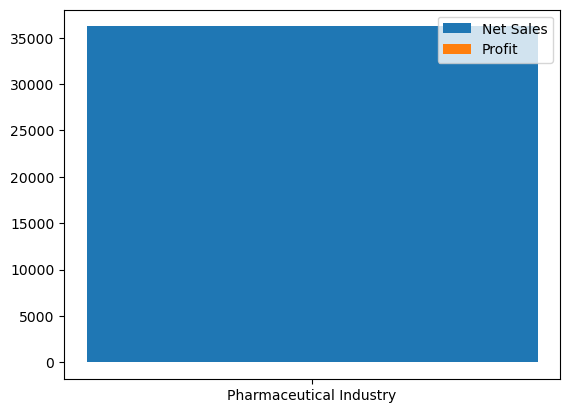

In [70]:
ind_snp6 = C.groupby("Industry")[["NetSales","Profit"]].sum().reset_index()


plt.bar(ind_snp6["Industry"],ind_snp6["NetSales"],label = "Net Sales")
plt.bar(ind_snp6["Industry"],ind_snp6["Profit"],label = "Profit")


plt.legend()
plt.show()

Seems like they are not making any profit

Net sales, cost of sales and profit for Company "C"

In [71]:
snp_c = C[["NetSales","CostofSales","Profit"]].sum().reset_index()
snp_c

,index,0
0,NetSales,36210
1,CostofSales,36213
2,Profit,-3


Most profitable departments of Company "C"

In [72]:
dep_snp_c = C.groupby("Department")["Profit"].sum().reset_index()
dep_snp_c.nlargest(10,"Profit")

,Department,Profit
4,dept-c-05,1378
21,dept-c-22,1018
28,dept-c-29,771
22,dept-c-23,664
13,dept-c-14,597
26,dept-c-27,573
10,dept-c-11,572
16,dept-c-17,556
17,dept-c-18,453
14,dept-c-15,425


Least profitable departments of Company "C"

In [73]:
dep_snp_c.nsmallest(10,"Profit")

,Department,Profit
0,dept-c-01,-933
2,dept-c-03,-823
29,dept-c-30,-822
19,dept-c-20,-772
12,dept-c-13,-756
15,dept-c-16,-709
18,dept-c-19,-658
25,dept-c-26,-656
8,dept-c-09,-563
7,dept-c-08,-517
